# Exercise Eight: Cultural Data

For this exercise, I explored the areas of film and cinema toward a dataset with a focus on historical, cultural data.  Choosing for the assignment and activity, Blockbuster.csv was selected along the lines of my related research. The dataset included a detailed collection of the top ten highest-grossing films from 1975 to 2018 taken from a crowdflower dataset. Over time, the data source enhanced coding exploration toward this week's focus to open up ideas toward using the "group by" methods to enable comparisons with the supplied dataset information. The initial area focused on film Genres and areas of Ranking, which continued toward adding and opening up more possible choices

## Stage One: Import Structured CSV Data (bonus: from multiple files)

Blockbusters.csv was imported and placed into a file to help avoid any error toward access through the use of separation.  And with the use of Pandas, the tone was set to decipher and explore initial areas and trends within Blockbusters.csv set as the data frame in question housed in the folder formed "busters."  As metadata in the form of text formated documents has the potential to create value when they are kept "in a tabular format" (Karsdorp, Kestemont, and Riddell 126).

In [18]:

import pandas as pd
import os
path = "busters/"
years = []
df_list = []

with os.scandir(path) as entries:
    for entry in entries:
        years.append(entry.name)
        temp_df = pd.read_csv(f'{path}{entry.name}')
        df_list.append(temp_df)
        
print(years[0])
print(df_list[0].head())

blockbusters (1).csv
  Main_Genre    Genre_2    Genre_3  imdb_rating  length  rank_in_year rating  \
0     Action  Adventure      Drama          7.4     135             1  PG-13   
1     Action  Adventure     Sci-Fi          8.5     156             2  PG-13   
2  Animation     Action  Adventure          7.8     118             3     PG   
3     Action  Adventure      Drama          6.2     129             4  PG-13   
4     Action     Comedy        NaN          7.8     119             5      R   

                 studio                           title worldwide_gross  year  
0  Walt Disney Pictures                   Black Panther    $700,059,566  2018  
1  Walt Disney Pictures          Avengers: Infinity War    $678,815,482  2018  
2                 Pixar                   Incredibles 2    $608,581,744  2018  
3    Universal Pictures  Jurassic World: Fallen Kingdom    $416,769,345  2018  
4      20th Century Fox                      Deadpool 2    $318,491,426  2018  


## Stage Two: Explore and note differences in headings / datatypes over the years

The use of the "for in" power headings and datatypes opened up for exploration for the benefit of comparisons later within this notebook. The simplicity of exploring "some general properties of the dataset," (Karsdorp, Kestemont, and Riddell 129) enables the coder to visualize the areas available toward focus. And once the titles accessible were revealed, "Main_Genre," objectivity was explored, allowing for the most popular use of "Action" and "Animation" toward the era of Top industry Films. 


In [19]:
[print(df.dtypes) for df in df_list]


Main_Genre          object
Genre_2             object
Genre_3             object
imdb_rating        float64
length               int64
rank_in_year         int64
rating              object
studio              object
title               object
worldwide_gross     object
year                 int64
dtype: object


[None]

In [20]:
[print(df['Main_Genre'].head()) for df in df_list]


0       Action
1       Action
2    Animation
3       Action
4       Action
Name: Main_Genre, dtype: object


[None]

## Stage Three: Use Groupby to Explore (by Region)

### Example #1

Utilizing the coded function and resource method of the "group by" protocol enables simplifying showcasing or dissecting the variants of two disparate subsets of data, involving "two elements: a column by which we want to aggregate rows and a function which takes the rows as input and produces a single result" (Karsdorp, Kestemont, and Riddell 138). 

In [65]:
close_region = df_list[0].groupby('studio')
close_region.get_group('Walt Disney Pictures').head()

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,"$700,059,566",2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"$678,815,482",2018
6,Action,Comedy,NaN,7.2,118,7,PG-13,Walt Disney Pictures,Ant-Man and the Wasp,"$216,648,740",2018
7,Action,Adventure,Drama,7.0,135,8,PG-13,Walt Disney Pictures,Solo: A Star Wars Story,"$213,767,512",2018
10,Action,Adventure,Drama,7.2,152,1,PG-13,Walt Disney Pictures,Star Wars: The Last Jedi,"$620,181,382",2017


In [67]:
print(close_region['imdb_rating'].mean())
print(close_region['rank_in_year'].mean())

studio
20th Century Fox                 7.127083
Columbia Pictures                6.741667
DreamWorks                       7.266667
Embassy Pictures                 7.000000
IFC Films                        6.600000
Lionsgate Films                  6.550000
Metro-Goldwyn-Mayer              7.255882
National Air and Space Museum    7.000000
Newmarket Films                  7.100000
Paramount Pictures               6.965517
Pixar                            8.022222
Sony Pictures                    6.905882
Sunn Classic Pictures            4.600000
Universal Pictures               6.876786
Walt Disney Pictures             7.235385
Warner Bros                      7.206897
Name: imdb_rating, dtype: float64
studio
20th Century Fox                  5.437500
Columbia Pictures                 6.111111
DreamWorks                        5.666667
Embassy Pictures                 10.000000
IFC Films                         9.000000
Lionsgate Films                   5.100000
Metro-Goldwyn-Mayer   

### Example #2

In [114]:
close_region = df_list[0].groupby('Main_Genre')
close_region.get_group('Adventure').head()

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
54,Adventure,Sci-Fi,NaN,7.7,146,5,PG-13,Lionsgate Films,The Hunger Games: Catching Fire,"$864,912,963.00",2013
101,Adventure,Action,NaN,6.2,122,2,PG-13,Paramount Pictures,Indiana Jones and the Kingdom of the Crystal S...,"$786,636,033.00",2008
106,Adventure,Action,NaN,6.7,106,7,PG-13,Metro-Goldwyn-Mayer,Quantum of Solace,"$586,090,727.00",2008
112,Adventure,Action,NaN,6.2,139,3,PG-13,Columbia Pictures,Spider-Man 3,"$890,871,626.00",2007
138,Adventure,Action,NaN,8.3,140,9,PG-13,Warner Bros,Batman Begins,"$372,710,015.00",2005


In [115]:
print(close_region['imdb_rating'].mean())
print(close_region['rank_in_year'].mean())

Main_Genre
Action       7.296667
Adventure    7.438462
Animation    7.345455
Comedy       6.938182
Crime        6.782353
Drama        7.303333
Family       6.631250
Fantasy      6.988889
History      7.580000
Horror       6.875000
Music        6.822222
Romance      6.862500
Sci-Fi       7.186000
Sport        7.028571
Thriller     7.104762
War          7.600000
Name: imdb_rating, dtype: float64
Main_Genre
Action       5.100000
Adventure    3.615385
Animation    5.909091
Comedy       5.945455
Crime        7.058824
Drama        5.233333
Family       5.937500
Fantasy      4.370370
History      5.000000
Horror       6.750000
Music        7.222222
Romance      5.583333
Sci-Fi       5.600000
Sport        4.142857
Thriller     5.825397
War          6.100000
Name: rank_in_year, dtype: float64


## Stage Four: Plot Grouped Data¶

While this course of action is the most explored process of the code and data frame components, attention and experimentation were enhanced by using the strategy to compare the grouped data relation. It promotes complete openness, allowing the process to formulate a platform for strengthening the pursuit of multiple opportunities toward visualization using a "Pandas library ...which allows us to plot our data" with more comfort (Karsdorp, Kestemont, and Riddell 146). Which was initially explored over time-framed supplied and then used to bring other elements further within the process of visualization of areas that may or not be a benefit toward exploring.  And after viewing the charted progress between associations, it was revealed that this data set may have had some advantages and challenges due to the limits of standard information and collected separation of resources of importance or relevance. 

Lionsgate
Films'
'Paramount
Pictures'
'Metro-Goldwyn-Mayer'

'Columbia
Pictures'
'Warner
Bros'
'20th
Century
Fox


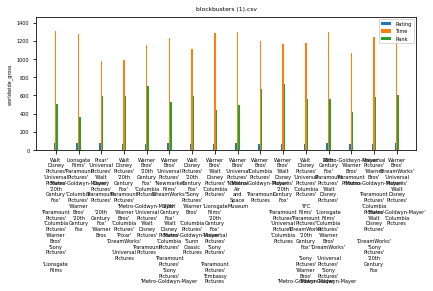

In [116]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 5})

regions = close_region['studio'].unique()
names = [str(i) for i in regions]
names = [name.replace(' ', '\n') for name in names]
names = [name.replace("['",'') for name in names]
names = [name.replace("']",'') for name in names]

print(names[1])
x = np.arange(len(names))
width = 1/len(names)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, close_region['imdb_rating'].mean()*10, width, label='Rating')
rects2 = ax.bar(x, close_region['length'].mean()*10, width, label='Time')
rects3 = ax.bar(x + width, close_region['rank_in_year'].mean()*100, width, label='Rank')


ax.set_ylabel('worldwide_gross')
ax.set_title(years[0])
ax.set_xticks(x)
ax.set_xticklabels(names)
ax.legend()
fig.tight_layout()

plt.show()

## Bonus: Additional forms of analysis or visualization 


Adventure


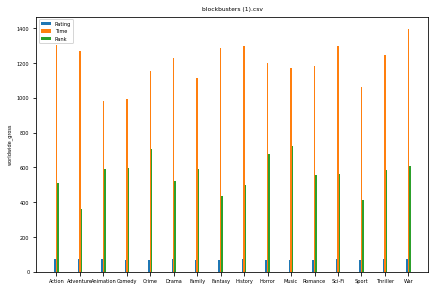

In [117]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 5})

regions = close_region['Main_Genre'].unique()
names = [str(i) for i in regions]
names = [name.replace(' ', '\n') for name in names]
names = [name.replace("['",'') for name in names]
names = [name.replace("']",'') for name in names]

print(names[1])
x = np.arange(len(names))
width = 1/len(names)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, close_region['imdb_rating'].mean()*10, width, label='Rating')
rects2 = ax.bar(x, close_region['length'].mean()*10, width, label='Time')
rects3 = ax.bar(x + width, close_region['rank_in_year'].mean()*100, width, label='Rank')


ax.set_ylabel('worldwide_gross')
ax.set_title(years[0])
ax.set_xticks(x)
ax.set_xticklabels(names)
ax.legend()
fig.tight_layout()

plt.show()

[nan
'Crime'
'Fantasy


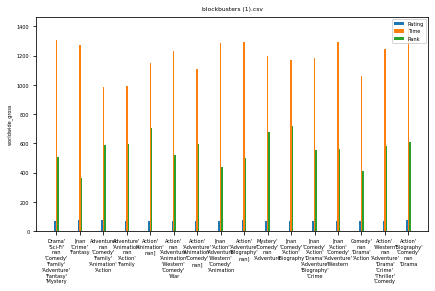

In [119]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 5})

regions = close_region['Genre_3'].unique()
names = [str(i) for i in regions]
names = [name.replace(' ', '\n') for name in names]
names = [name.replace("['",'') for name in names]
names = [name.replace("']",'') for name in names]

print(names[1])
x = np.arange(len(names))
width = 1/len(names)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, close_region['imdb_rating'].mean()*10, width, label='Rating')
rects2 = ax.bar(x, close_region['length'].mean()*10, width, label='Time')
rects3 = ax.bar(x + width, close_region['rank_in_year'].mean()*100, width, label='Rank')


ax.set_ylabel('worldwide_gross')
ax.set_title(years[0])
ax.set_xticks(x)
ax.set_xticklabels(names)
ax.legend()
fig.tight_layout()

plt.show()

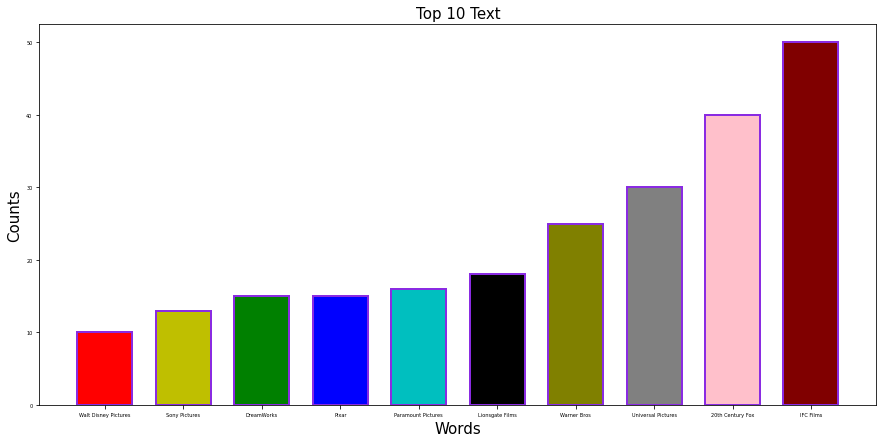

<Figure size 1080x504 with 0 Axes>

In [157]:
words = ['Walt Disney Pictures', 'Sony Pictures','DreamWorks', 'Pixar', 'Paramount Pictures', 'Lionsgate Films', 
           'Warner Bros', 'Universal Pictures', '20th Century Fox', 
           'IFC Films'] 
counts = [10, 13, 15, 15, 16, 18, 25, 30, 40, 50]


plt.figure(figsize=[15, 7])

# Creating a bar chart with bars of different color
plt.bar(words, counts, width=0.7, edgecolor='blueviolet',
        color=['r', 'y', 'g', 'b', 'c', 'k', 
               'olive', 'gray', 'pink', 'maroon'], linewidth=2)

plt.title('Top 10 Text', fontsize=15)
plt.xlabel('Words', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()


# Set colors to the bars using colormaps available in matplotlib

plt.figure(figsize=[15, 7])
col_map = plt.get_cmap('Paired')

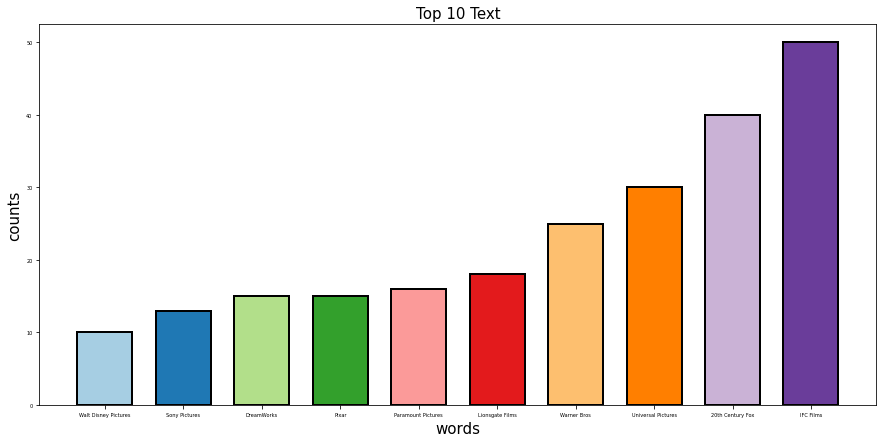

In [158]:
plt.figure(figsize=[15, 7])

# Creating a bar chart with bars of different color
plt.bar(words, counts, width=0.7, edgecolor='blueviolet',
        color=['r', 'y', 'g', 'b', 'c', 'k', 
               'olive', 'gray', 'pink', 'maroon'], linewidth=2)

# Creating a bar chart with bars of different color using colormap
plt.bar(words, counts, width=0.7, color=col_map.colors, edgecolor='k', 
        linewidth=2)

plt.title('Top 10 Text', fontsize=15)
plt.xlabel('words', fontsize=15)
plt.ylabel('counts', fontsize=15)
plt.show()

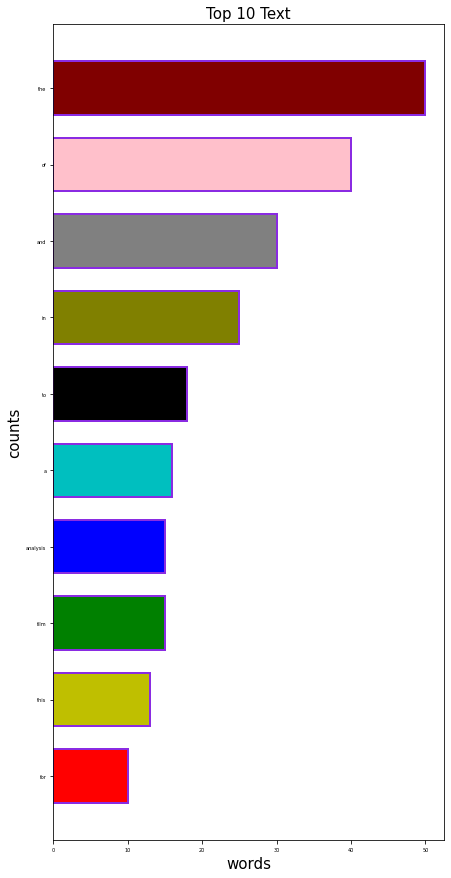

In [159]:
# Importing the required libraries
from matplotlib import pyplot as plt

# Preparing the data to plot
words = ['for', 'this','film', 'analysis', 'a', 'to', 
           'in', 'and', 'of', 
           'the'] 
total = [10, 13, 15, 15, 16, 18, 25, 30, 40, 50]

plt.figure(figsize=[7,15])
col_map = plt.get_cmap('Paired')

# Creating a bar chart with bars of different color
plt.barh(words, counts, height=0.7, edgecolor='blueviolet',
        color=['r', 'y', 'g', 'b', 'c', 'k', 
               'olive', 'gray', 'pink', 'maroon'], linewidth=2)

plt.title('Top 10 Text', fontsize=15)
plt.xlabel('words', fontsize=15)
plt.ylabel('counts', fontsize=15)
plt.show()